# LETS DO THIS

OK, let's do this. First we need to import the necessary modules and initialize 2 separate models - the Unicycle-based unrolled model and the standard FC model. Let's do that.

In [1]:
# Import the necessary modules
import tensorflow as tf
import sys
sys.path.append('model')
from unicycle import mnist_benchmark, mnist_tfutils, Unicycle
import matplotlib
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from random import randint
from utility_functions import fetch_node

# Import all the data!

Now, we import the MNIST data:

In [2]:
# Import MNIST data
batch_size = 256

# mnist variable is an instance of the DataSet class.
mnist = input_data.read_data_sets("MNIST_data/")
mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11895f150>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11895f1d0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11895f210>)

## Check the data
To access training images, use ```mnist.train.images```, and same for labels

In [3]:
print 'Number of training images with shape %s: %s' % \
    (list(np.shape(mnist.train.images)[1:]),np.shape(mnist.train.images)[0])
print 'Number of training labels: %s' % \
    (np.shape(mnist.train.labels)[0])
print
print 'Number of test images with shape %s: %s' % \
    (list(np.shape(mnist.test.images)[1:]),np.shape(mnist.test.images)[0])
print 'Number of test labels: %s' % \
    (np.shape(mnist.test.labels)[0])
print
print 'Number of validation images with shape %s: %s' % \
    (list(np.shape(mnist.validation.images)[1:]),np.shape(mnist.validation.images)[0])
print 'Number of validation labels: %s' % \
    (np.shape(mnist.validation.labels)[0])

Number of training images with shape [784]: 55000
Number of training labels: 55000

Number of test images with shape [784]: 10000
Number of test labels: 10000

Number of validation images with shape [784]: 5000
Number of validation labels: 5000


## Print out 3 random examples

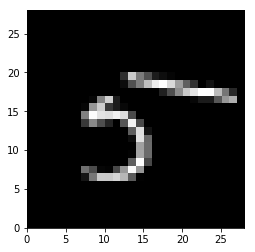

^ 5


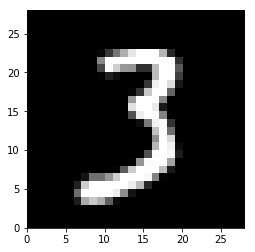

^ 3


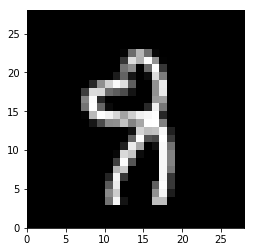

^ 8


In [4]:
import numpy as NP
import matplotlib.pyplot as P
import matplotlib.ticker as MT
import matplotlib.cm as CM

def imagesc(W, pixwidth=1, ax=None, grayscale=True):
    """
    Do intensity plot, similar to MATLAB imagesc()
    W = intensity matrix to visualize
    pixwidth = size of each W element
    ax = matplotlib Axes to draw on 
    grayscale = use grayscale color map
    Rely on caller to .show()
    """
    # N = rows, M = column
    (N, M) = W.shape 
    # Need to create a new Axes?
    if(ax == None):
        ax = matplotlib.pyplot.figure().gca()
    # extents = Left Right Bottom Top
    exts = (0, pixwidth * M, 0, pixwidth * N)
    if(grayscale):
        ax.imshow(W,
                  interpolation='nearest',
                  cmap=matplotlib.cm.gray,
                  extent=exts)
    else:
        ax.imshow(W,
                  interpolation='nearest',
                  extent=exts)
        
    matplotlib.pyplot.show()
#     return ax


for _ in range(3):
    a=randint(1,1000)
    imagesc(np.reshape(mnist.train.images[a,:],(28,28))),
    print '^', mnist.train.labels[a]

# Model Initialization
## Simple model

Let's initialize the models, starting with the basic FC model:

In [5]:
sess = tf.Session()

In [6]:
simple_fc_output, etc = mnist_benchmark( tf.constant(mnist.train.images[0:256]) )
fc1, fc2 = etc['weights']

[256, 784]


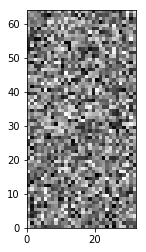

Image 0 FC1 weights ^


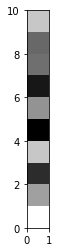

Image 0 FC2 weights ^


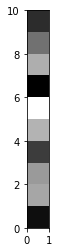

Image 0 output ^


In [7]:
# Initialize all the variables
sess.run(tf.global_variables_initializer())

with tf.variable_scope('simple'):
    result, fc1r, fc2r = sess.run([simple_fc_output, fc1, fc2])
    
imagesc(np.reshape(fc1r[0,:],(64,32)))
print 'Image 0 FC1 weights ^'
imagesc(np.transpose(fc2r[0:1,:]))
print 'Image 0 FC2 weights ^'
imagesc(np.transpose(result[0:1]))
print 'Image 0 output ^'

## Unicycle model



In [8]:
unicycle_model = Unicycle()
G = unicycle_model.build(json_file_name='sample_mnist.json')
last_ = unicycle_model({'images': tf.constant(mnist.train.images[0:256])}, G)

Unicycle Initialized

        Welcome to

$$\   $$\ $$\   $$\ $$$$$$\  $$$$$$\ $$\     $$\  $$$$$$\  $$\       $$$$$$$$\
$$ |  $$ |$$$\  $$ |\_$$  _|$$  __$$\\$$\   $$  |$$  __$$\ $$ |      $$  _____|
$$ |  $$ |$$$$\ $$ |  $$ |  $$ /  \__|\$$\ $$  / $$ /  \__|$$ |      $$ |
$$ |  $$ |$$ $$\$$ |  $$ |  $$ |       \$$$$  /  $$ |      $$ |      $$$$$\
$$ |  $$ |$$ \$$$$ |  $$ |  $$ |        \$$  /   $$ |      $$ |      $$  __|
$$ |  $$ |$$ |\$$$ |  $$ |  $$ |  $$\    $$ |    $$ |  $$\ $$ |      $$ |
\$$$$$$  |$$ | \$$ |$$$$$$\ \$$$$$$  |   $$ |    \$$$$$$  |$$$$$$$$\ $$$$$$$$\
 \______/ \__|  \__|\______| \______/    \__|     \______/ \________|\________|

        *The Universal Neural Interpretation and Cyclicity Engine


STEP 1
 JSON Import and Parse

Using JSON file SAMPLE_MNIST.JSON for import... done! 

Checking the integrity of the JSON file... done! 

STEP 2
 Network-X Raw Build

Building Network-X Raw DiGraph... 

Network-X Raw Graph created! Nodes: 
    fc_1
    fc_2
    image_in

## Print out all the Variables for visual reference purposes

In [9]:
print [i.name for i in tf.global_variables()]

[u'fcw1:0', u'fcb1:0', u'fcw2:0', u'fcb2:0', u'weights_fc_1:0', u'biases_fc_1:0', u'decay_param_fc_1:0', u'weights_fc_2:0', u'biases_fc_2:0', u'decay_param_fc_2:0']


In [10]:
fc1wu = fetch_node(nickname='fc_1',graph=G)[0]
fc1wu

{u'functions': [{u'bias': 0.1,
   u'init': u'trunc_norm',
   u'output_size': 2048,
   u'seed': 12345,
   u'type': u'fc'}],
 'harbor': <harbor.Harbor at 0x11895fe50>,
 u'nickname': u'fc_1',
 'output_size': [256, 2048],
 'state_size': [256, 2048],
 'tf_cell': <GenFuncCell.GenFuncCell at 0x11bec4290>,
 u'type': u'cell'}

In [11]:
# Initialize all the variables
sess.run(tf.global_variables_initializer())

outu, fc1ur, fc2ur = sess.run([G.node['fc_2']['tf_cell'].get_state(),tf.get_variable('weights_fc_1'),tf.get_variable('weights_fc_2')])
mem1, mem2 = sess.run([tf.get_variable('decay_param_fc_1'),tf.get_variable('decay_param_fc_1')])

print 'Decay parameter for FC1:', mem1[0]
print 'Decay parameter for FC2:', mem2[0]

Decay parameter for FC1: 0.0
Decay parameter for FC2: 0.0


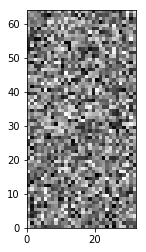

Image 0 FC1 weights ^


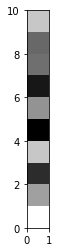

Image 0 FC2 weights ^


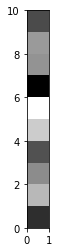

Image 0 outputs ^


In [24]:
imagesc(np.reshape(fc1ur[0,:],(64,32)))
print 'Image 0 FC1 weights ^'
imagesc(np.transpose(fc2ur[0:1]))
print 'Image 0 FC2 weights ^'
imagesc(np.transpose(outu[0:1]))
print 'Image 0 outputs ^'

In [13]:
G.node['fc_2']['tf_cell'].states

[<tf.Tensor 'zeros_5:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_3:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_5:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_7:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_9:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_11:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_13:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_15:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_17:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_19:0' shape=(256, 10) dtype=float32>,
 <tf.Tensor 'add_21:0' shape=(256, 10) dtype=float32>]

In [19]:
loss_uni = tf.nn.sparse_softmax_cross_entropy_with_logits(outu, np.int_(mnist.train.labels[0:256]))
loss_fc = tf.nn.sparse_softmax_cross_entropy_with_logits(result, np.int_(mnist.train.labels[0:256]))

## TensorBoard Visualize
Visualize the Graph using TensorBoard. To do this we add the graph definition into a Writer and then run `tensorboard --logdir=run1:<dir_to_current_folder/tensorboard> --port 6006`

In [15]:
writer = tf.train.SummaryWriter('tensorboard/', graph=tf.get_default_graph())

writer.add_graph(tf.get_default_graph())

Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.


## Compare states
Subtract to check they're the same yo.

In [31]:
final_error=np.sum(fc1ur-fc1r)/fc1ur.shape[0]/fc1ur.shape[1]

In [32]:
final_error

1.0250745654790376e-05